<h1>Building Linear Regression From Scratch</h1>

<h4>Importing necessary libraries</h4>

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h4>Reading data</h4>

In [2]:
df = pd.read_csv('/kaggle/input/boston-housing-dataset/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<h4>Checking null values</h4>

In [3]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

<h4>Dropping null values from the data</h4>

In [4]:
df.dropna(inplace=True)

<h4>Checking correlation between variables in data</h4>

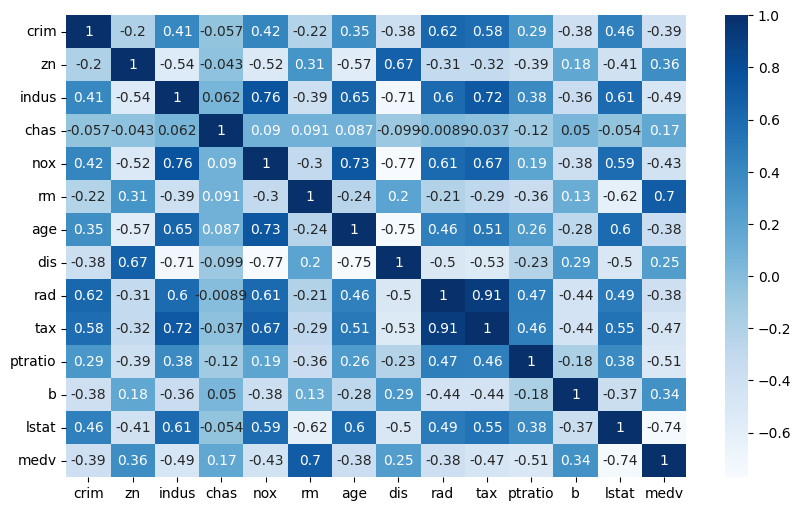

In [5]:
cor = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor, cmap="Blues", annot=True);

<h4>Calculating Inter Quartile Range to remove outliers</h4>

In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(IQR)

crim         3.61112
zn          12.50000
indus       12.91000
chas         0.00000
nox          0.17500
rm           0.74100
age         49.00000
dis          3.02980
rad         20.00000
tax        387.00000
ptratio      2.80000
b           21.02000
lstat       10.02000
medv         8.00000
dtype: float64


<h4>Removing outliers in the data</h4>

In [7]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
df.shape

(264, 14)

<h4>Building our own Linear Regression</h4>

In [8]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iters=1000, batch_size=32):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X, y = np.array(X), np.array(y)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            for i in range(0, n_samples, self.batch_size):
                batch_indices = indices[i:i + self.batch_size]
                X_batch, y_batch = X[batch_indices], y[batch_indices]
                y_pred = np.dot(X_batch, self.weights) + self.bias
                error = y_pred - y_batch
                dw = (1 / len(X_batch)) * np.dot(X_batch.T, error)
                db = (1 / len(X_batch)) * np.sum(error)
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
                
        return self

    def predict(self, X):
        X = np.array(X)
        return np.dot(X, self.weights) + self.bias

<h4>Importing necessary ML libraries</h4>

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

<h4>Extracting features and preprocessing the data</h4>

In [10]:
X = df.drop('medv', axis=1)
y = df['medv']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h4>Splitting training and testing data</h4>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<h4>Implementing Own Linear Regression Model</h4>

In [12]:
lr_scratch = LinearRegressionScratch()
lr_scratch.fit(X_train, y_train)

In [13]:
y_pred_scratch = lr_scratch.predict(X_test)

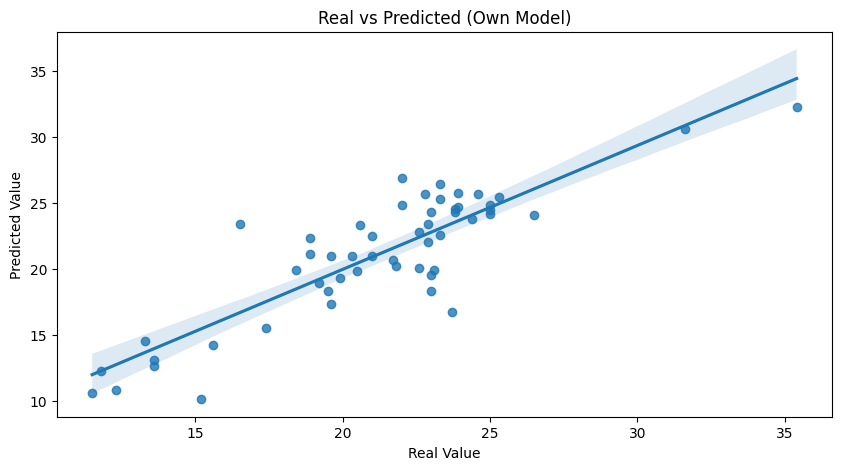

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.regplot(x=y_test, y=y_pred_scratch, ax=ax)
ax.set_title("Real vs Predicted (Own Model)")
ax.set_xlabel("Real Value")
ax.set_ylabel("Predicted Value");

In [15]:
r2_scratch = r2_score(y_test, y_pred_scratch)
rmse_scratch = math.sqrt(mean_squared_error(y_test, y_pred_scratch))
print(f"R-Squared Value for Own Model: {r2_scratch}")
print(f"Root Mean Squared Error for Own Model: {rmse_scratch}")

R-Squared Value for Own Model: 0.7134890964027591
Root Mean Squared Error for Own Model: 2.4075451555176293


<h4>Implementing Scikit Learn's Linear Regression Model</h4>

In [16]:
from sklearn.linear_model import LinearRegression

lr_scikit = LinearRegression()
lr_scikit.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred_scikit = lr_scikit.predict(X_test)

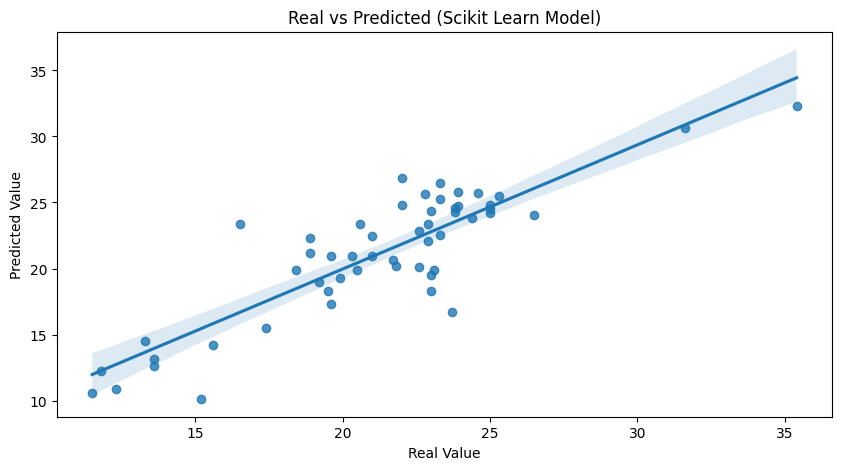

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.regplot(x=y_test, y=y_pred_scikit, ax=ax)
ax.set_title("Real vs Predicted (Scikit Learn Model)")
ax.set_xlabel("Real Value")
ax.set_ylabel("Predicted Value");

In [19]:
r2_scikit = r2_score(y_test, y_pred_scikit)
rmse_scikit = math.sqrt(mean_squared_error(y_test, y_pred_scikit))
print(f"R-Squared Value for Scikit Learn Model: {r2_scikit}")
print(f"Root Mean Squared Error for Scikit Learn Model: {rmse_scikit}")

R-Squared Value for Scikit Learn Model: 0.7127976649348681
Root Mean Squared Error for Scikit Learn Model: 2.4104484470700047


<h4>END</h4>